In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.linalg import svd
from matplotlib.pyplot import *
%matplotlib widget

In [3]:
import sys
sys.path.append("../../../")

import numerical_methods as Sim

In [4]:
shape = (200,200)
filter_radius = 15

PELMSim = Sim.PELM_algsolver(shape, filter_radius)

In [5]:
F = 10
f = np.linspace(0,1,F)

feature_points = np.zeros((2, 2*F, 1))
feature_points[0,:F,0] = f
feature_points[1,F:,0] = f

# Config
encoding_shape = (10,10)

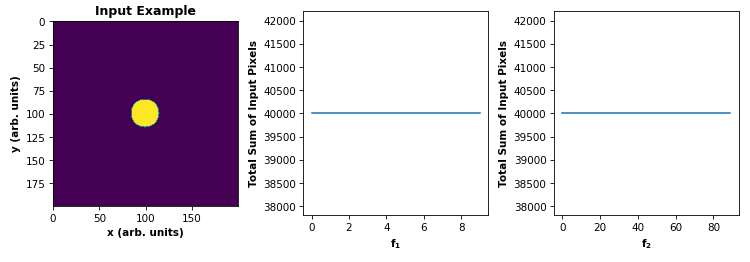

In [7]:
## Generate Input Profiles
input_masks = np.exp(1j*2*np.pi*Sim.ContinuosFeatures(f, f, encoding_shape, shape, ref=1/3))  ## More types of encodings on the masks.py file

fig, axs = subplots(1, 3, figsize=(10,3.5))
axs[0].imshow(np.abs(input_masks[3])*PELMSim.filter)
axs[0].set_title("Input Example", weight="bold")

axs[0].set_xlabel("x (arb. units)", weight="bold")
axs[0].set_ylabel("y (arb. units)", weight="bold")

axs[1].plot(np.sum(np.abs(input_masks)[:F], axis=(1,2)))
axs[1].set_xlabel(r"$\mathbf{f_1}$")
axs[1].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[2].plot(np.sum(np.abs(input_masks)[F:], axis=(1,2)))
axs[2].set_xlabel(r"$\mathbf{f_2}$")
axs[2].set_ylabel("Total Sum of Input Pixels", weight="bold")

fig.tight_layout()

In [8]:
M = 10
noise_percentages = np.linspace(0,50,M)

hidden_features = np.zeros((M, F**2, *shape))
for _m in range(M):
    hidden_features[_m] = PELMSim.solver(input_masks, normed=True, noise=noise_percentages[_m])
    

In [9]:
svds = np.zeros((M, F**2))
for _m in range(M):
    svds[_m] = Sim.Compute_Rank(hidden_features[_m])

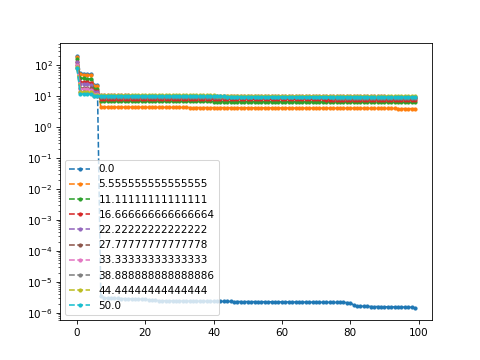

In [10]:
fig, axs = subplots(1)
for _m in range(M):
    axs.plot(svds[_m], "--", marker=".", label=noise_percentages[_m])
    
axs.set_yscale("log")
axs.legend()

The singular values are quite robust up to 16%. Phase modulation is more robust than amplitude modulation.